# Théo 1

How many neurons would you like in the hidden layer n° 1 ? 8


[0.31848826 0.31848829 0.31848829 0.31848829 0.31848829 0.31848829
 0.31848829 0.31848829 0.31848829 0.31848829 0.31848829 0.31848829
 0.31848829 0.31848829 0.31848829 0.31848829 0.31848829 0.31848829
 0.31848829 0.31848829]
[0.31848826 0.31848829]


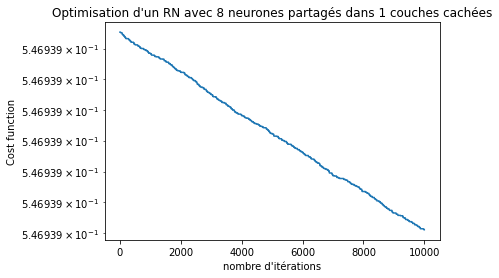

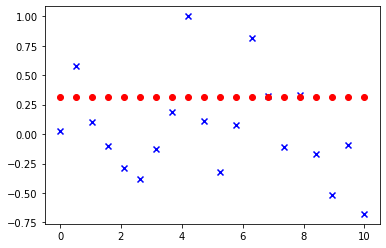

In [15]:
"""
Created on Tue Mar  9 21:14:38 2021
@author: theophilebaggio
"""


import numpy as np
from math import *
import random as rd
import matplotlib.pyplot as plt

def activate(x,W,b):
    M = 1/(1 + np.exp(-(W.dot(x) + b)))
    return M

def cost_function(Weight_mat_list,bias_list,X,Y):
    costvec = np.zeros(len(X))
    for i in range(0,len(X)):
        x = np.array(X[i]).reshape(1,1)
        y = np.array(Y[i]).reshape(1,1)
        a = x
        for j in range(len(bias_list)):
            a = activate(a,Weight_mat_list[j],bias_list[j])
        costvec[i] = np.linalg.norm(y-a,2)
    costvalue = 1/len(costvec) * 1/2 * np.linalg.norm(costvec,2)**2
    return costvalue

def predict(Weight_mat_list,bias_list,X):
    prediction_list = []
    for i in range(len(X)):
        a = np.array(X[i]).reshape(1,1)
        for j in range(len(bias_list)):
            a = activate(a,Weight_mat_list[j],bias_list[j])
        prediction_list.append(a[0][0])
    return np.array(prediction_list)

def generate(n,a,b):
    points = np.linspace(a,b,n)
    target = np.cos(points) + np.random.randn(n)
    m = 1/max(target[:])
    target = target[:]*m
    
    return [np.concatenate((points, target), axis=0).reshape((2,n)),m]          
    
## MAIN PROGRAM
#data
nbdonnees = 20
I1 = 0
I2 = 10
res= generate(nbdonnees,I1,I2)
donnees = res[0]
coeff = res[1]
#donnees = np.array([[0.1,0.3,0.1,0.6,0.4,0.6,0.5,0.9,0.4,0.7],\
                    #[0.1,0.4,0.5,0.9,0.2,0.3,0.6,0.2,0.4,0.6]])

nb_layers = 1
liste_nb_neurons = []
liste_weigth_mat = []
liste_bias = []

for i in range(nb_layers):
    n = i+1
    neurons = int(input('How many neurons would you like\
 in the hidden layer n° {} ?'.format(n)))
    liste_nb_neurons.append(neurons)

nb_n_hid_lay = sum(liste_nb_neurons)
nbinput = 1
nboutput = 1 
liste_nb_neurons.append(nboutput)
liste_nb_neurons.insert(0,nbinput)
 
for nb in range(nb_layers+1):
    n_current_layer = liste_nb_neurons[nb+1]
    n_previous_layer = liste_nb_neurons[nb]#nb de neurones dans la hidden layer
    np.random.seed(5);
    weight_mat  = 1/2 * np.random.randint(10,\
                                           size=(n_current_layer,n_previous_layer))
    bias=1/2 * np.random.randint(10, size=(n_current_layer,1))
    liste_weigth_mat.append(weight_mat)
    liste_bias.append(bias)
    
##initialisation des paramètres du gradient stochastique
eta = 0.05 #learnig rate
Niter = 10000#nombre d'iterations maximum
savecost = np.zeros((Niter))

for i in range(0,Niter):
    
    #feedforward
    k = np.random.randint(len(donnees[0]))
    x = donnees[0,k].reshape(nbinput,1) 
    activation_vect = [x]
    d_activation_vect = []
    mat_da_vect = []
    
    for j in range(nb_layers + 1):
        a = activate(activation_vect[j],liste_weigth_mat[j],\
                                        liste_bias[j])
        activation_vect.append(a)
        d_activation_vect.append(a*(1-a))
        mat_da_vect.append(np.diag(d_activation_vect[j][:,0]))
    
    #backpropagation
    liste_delta = []
    delta_out = mat_da_vect[-1].dot\
        ((activation_vect[-1]-donnees[1,k].reshape(nboutput,1)))
    liste_delta.append(delta_out)
    
    for j in range(nb_layers):
        delta = mat_da_vect[-1 -(j+1)].dot\
            (np.transpose(liste_weigth_mat[-1 - j]).dot(liste_delta[j]))
        liste_delta.append(delta)
    liste_delta.reverse()
    
    #on ajuste les coefficients
    for j in range(len(liste_delta)):
        a = activation_vect[-1-(j+1)]
        prov_value = liste_delta[-1-j].dot(np.transpose(a))
        mat = liste_weigth_mat[-1-j]
        liste_weigth_mat[-1-j] = mat - eta*prov_value
        liste_bias[-1-j] = liste_bias[-1-j]- eta*liste_delta[-1-j]
    
    #on sauve la valeur de la cost function après chaque itération de
    #la méthode du gradient stochastique
    savecost[i] = cost_function(liste_weigth_mat,\
                               liste_bias,  donnees[0], donnees[1])

predictions = predict(liste_weigth_mat,liste_bias,donnees[0])*coeff
print(predictions)
    
plt.figure(1)
plt.semilogy(savecost)
plt.xlabel("nombre d'itérations")
plt.ylabel('Cost function')
plt.title("Optimisation d'un RN avec {} neurones partagés dans\
 {} couches cachées".format(nb_n_hid_lay,nb_layers))
 
plt.figure(2)
plt.scatter(donnees[0],donnees[1],c ='blue',marker='x')
plt.plot(donnees[0],predictions,'ro')


In [16]:
print(generate(nbdonnees,I1,I2))

[array([[ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
         5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
         7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ],
       [ 0.02664014,  0.57783837,  0.10081777, -0.09969609, -0.28817405,
        -0.38177692, -0.1236321 ,  0.18309952,  1.        ,  0.10933273,
        -0.32397654,  0.07394676,  0.81913027,  0.31881492, -0.11223157,
         0.33561039, -0.16792742, -0.51342025, -0.08924674, -0.6779536 ]]), 0.31848828903735243]


# Théo 2

How many neurons would you like in the hidden layer n° 1 ? 8


[0.76632584 0.81685096 0.86737607 0.91790119 0.9684263  1.01895142
 1.06947654 1.12000165 1.17052677 1.22105188 1.271577   1.32210212
 1.37262723 1.42315235 1.47367746 1.52420258 1.5747277  1.62525281
 1.67577793 1.72630305 1.77682816 1.82735328 1.87787839 1.92840351
 1.97892863]


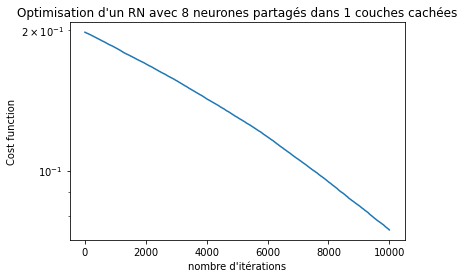

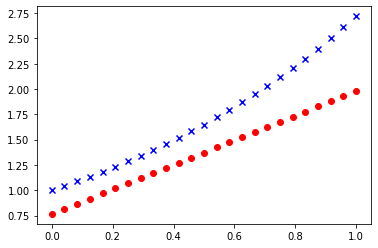

In [10]:

import numpy as np
from math import *
import random as rd
import matplotlib.pyplot as plt

def activate(x,W,b):
    u = W.dot(x) + b
    M = np.maximum(u,np.zeros(u.shape))
    return M

def cost_function(Weight_mat_list,bias_list,X,Y):
    costvec = np.zeros(len(X))
    for i in range(0,len(X)):
        x = np.array(X[i]).reshape(1,1)
        y = np.array(Y[i]).reshape(1,1)
        a = x
        for j in range(len(bias_list)):
            a = activate(a,Weight_mat_list[j],bias_list[j])
        costvec[i] = np.linalg.norm(y-a,2)
    costvalue = 1/len(costvec) * 1/2 * np.linalg.norm(costvec,2)**2
    return costvalue

def predict(Weight_mat_list,bias_list,X):
    prediction_list = []
    for i in range(len(X)):
        a = np.array(X[i]).reshape(1,1)
        for j in range(len(bias_list)):
            a = activate(a,Weight_mat_list[j],bias_list[j])
        prediction_list.append(a[0][0])
    return np.array(prediction_list)

def generate(n,a,b):
    points = np.linspace(a,b,n)
    target = np.exp(points) #+ np.random.randn(n)
    m = 1 # 1/max(target[:])
    target = target[:]*m
    
    return [np.concatenate((points, target), axis=0).reshape((2,n)),m]          
    
## MAIN PROGRAM
#data
nbdonnees = 25
I1 = 0
I2 = 1
res= generate(nbdonnees,I1,I2)
donnees = res[0]
coeff = res[1]
#donnees = np.array([[0.1,0.3,0.1,0.6,0.4,0.6,0.5,0.9,0.4,0.7],\
                    #[0.1,0.4,0.5,0.9,0.2,0.3,0.6,0.2,0.4,0.6]])

nb_layers = 1
liste_nb_neurons = []
liste_weigth_mat = []
liste_bias = []

for i in range(nb_layers):
    n = i+1
    neurons = int(input('How many neurons would you like\
 in the hidden layer n° {} ?'.format(n)))
    liste_nb_neurons.append(neurons)

nb_n_hid_lay = sum(liste_nb_neurons)
nbinput = 1
nboutput = 1 
liste_nb_neurons.append(nboutput)
liste_nb_neurons.insert(0,nbinput)
 
for nb in range(nb_layers+1):
    n_current_layer = liste_nb_neurons[nb+1]
    n_previous_layer = liste_nb_neurons[nb]#nb de neurones dans la hidden layer
    #np.random.seed(5);
    weight_mat  = 1/2 * np.random.uniform(0.5,1,\
                                           size=(n_current_layer,n_previous_layer))
    bias=1/2 * np.random.uniform(0.2,0.5, size=(n_current_layer,1))
    liste_weigth_mat.append(weight_mat)
    liste_bias.append(bias)
    
##initialisation des paramètres du gradient stochastique
eta = 0.000006   #learnig rate
Niter = 10000#nombre d'iterations maximum
savecost = np.zeros((Niter))

for i in range(0,Niter):
    
    #feedforward
    k = np.random.randint(len(donnees[0]))
    x = donnees[0,k].reshape(nbinput,1) 
    activation_vect = [x]
    d_activation_vect = []
    mat_da_vect = []
    
    for j in range(nb_layers + 1):
        a = activate(activation_vect[j],liste_weigth_mat[j],\
                                        liste_bias[j])
        activation_vect.append(a)
        ab= a
        ab[np.where(ab<0)] = 0
        ab[np.where(ab>0)] = 1
        d_activation_vect.append(ab)
        mat_da_vect.append(np.diag(d_activation_vect[j][:,0]))
    
    #backpropagation
    liste_delta = []
    delta_out = mat_da_vect[-1].dot\
        ((activation_vect[-1]-donnees[1,k].reshape(nboutput,1)))
    liste_delta.append(delta_out)
    
    for j in range(nb_layers):
        delta = mat_da_vect[-1 -(j+1)].dot\
            (np.transpose(liste_weigth_mat[-1 - j]).dot(liste_delta[j]))
        liste_delta.append(delta)
    liste_delta.reverse()
    
    #on ajuste les coefficients
    for j in range(len(liste_delta)):
        a = activation_vect[-1-(j+1)]
        prov_value = liste_delta[-1-j].dot(np.transpose(a))
        mat = liste_weigth_mat[-1-j]
        liste_weigth_mat[-1-j] = mat - eta*prov_value
        liste_bias[-1-j] = liste_bias[-1-j]- eta*liste_delta[-1-j]
    
    #on sauve la valeur de la cost function après chaque itération de
    #la méthode du gradient stochastique
    savecost[i] = cost_function(liste_weigth_mat,\
                               liste_bias,  donnees[0], donnees[1])

predictions = predict(liste_weigth_mat,liste_bias,donnees[0])*coeff
print(predictions)
    
plt.figure(1)
plt.semilogy(savecost)
plt.xlabel("nombre d'itérations")
plt.ylabel('Cost function')
plt.title("Optimisation d'un RN avec {} neurones partagés dans\
 {} couches cachées".format(nb_n_hid_lay,nb_layers))
 
plt.figure(2)
plt.scatter(donnees[0],donnees[1],c ='blue',marker='x')
plt.plot(donnees[0],predictions,'ro')





# Raphaël 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from tqdm.notebook import tqdm # Permet d'afficher une barre de chargement. 
    #Optionnel, mais permet d'estimer si l'on a été trop ambitieux sur le du réseau


class MCP_Regresseur :
    
    def __init__(self, InfosCC, Max_iter = 10000, seed = 1, pas = 0.3):
        """
        Cette fonction va permettre d'assigner dans des variables locales à la classe les informations sur le MCP
        """
        # On récupère les couches 
        self.N_CC = len(InfosCC) + 1
        self.T_CC = np.ones(self.N_CC, dtype = int)
        for couche in range(self.N_CC - 1) :
            self.T_CC[couche] = InfosCC[couche] # Dans la dernière couche, on a un seul neurone
        
        # On récupère les autres informations
        self.Max_iter = Max_iter
        self.seed = seed
        self.pas = pas


    def activation(self, x, Coef, Biais) :
        """
        Fonction d'activation de la fonction. Ici une sigmoïde
        """
        A = 1 / (1 + np.exp( - (Coef.dot(x) + Biais)))
        return A
    

    def fit(self, data, target):
        """
        Fonction d'apprentissage sur un couple (data,target)
        """

        # Pour une écriture plus simple, on récupère les variables locales à la classe qui seront les plus appelées
        N_CC = self.N_CC
        T_CC = self.T_CC
        pas = self.pas

        # On s'intéresse aux données fournies 
        Dim_E = np.ones(N_CC, dtype = int)
        if (data.ndim == 1):
            Dim_E[0] = 1
        else :
            Dim_E[0] = data.shape[1]
        Dim_E[1:] = T_CC[0:-1]

        Dim_S = np.ones(N_CC, dtype = int)
        if (target.ndim == 1):
            Dim_S[-1] = 1
        else :
            Dim_S[-1] = target.shape[1]
        
        T_ech = len(data)

        # On génère les matrices de Coefficients de Poids
        Coefs = {} # On va utiliser un dictionnaire pour une lecture plus aisée

        for couche in range(N_CC):
            for neurone in range(T_CC[couche]):
                Coefs[couche,neurone] = 0.5 * np.random.rand(Dim_S[couche], Dim_E[couche])
                
        # On génère les vecteurs de Biais
        Biais = {}
        
        for couche in range(N_CC):
            for neurone in range(T_CC[couche]):
                Biais[couche,neurone] = 0.5 * np.random.rand(Dim_S[couche], 1)
                
        # Etapes de Convergence
        barre = tqdm(total = self.Max_iter) # Initialisation de la barre de progression
        
        for epoch in range(self.Max_iter):
            barre.update(1) # La barre avance
            
            k = np.random.randint(T_ech) # Méthode stochastique
            x = data[k].reshape(-1,1)
            y = target[k].reshape(-1,1)
            
            # Propagation avant
            a = {} # On stocke les sorties de neurones
            
            x_temp = x
            for couche in range(N_CC):
                if (couche != (N_CC - 1)):
                    x_newtemp = np.zeros((T_CC[couche],1))
                    for neurone in range(T_CC[couche]):
                        a[couche,neurone] = self.activation(x_temp, Coefs[couche,neurone], Biais[couche,neurone])
                        x_newtemp[neurone] = a[couche,neurone]
                    x_temp = x_newtemp.reshape(-1,1)
                else :
                    for neurone in range(T_CC[-1]):
                        a[couche,neurone] = self.activation(x_temp, Coefs[couche,neurone], Biais[couche,neurone])
            
            
            # Calcul du gradient
            delta = {}
            
            for couche in range(N_CC):
                couche_retro = N_CC - couche - 1
                
                for neurone in range(T_CC[couche_retro]): 
                    a_temp = a[couche_retro,neurone]
                    derivee = (a_temp * (1 - a_temp))
                    
                    if (couche == 0):
                        delta[couche_retro,neurone] = - (y - a_temp).T.dot(derivee)
                
                    elif (couche == 1):
                        for neurone_retro in range(T_CC[couche_retro + 1]):
                            sum_d = Coefs[couche_retro + 1,neurone_retro][0,neurone] * delta[couche_retro + 1,neurone_retro]
                        sum_d = np.sum(sum_d)
                        
                        delta[couche_retro,neurone] = sum_d * derivee
                
                    else :
                        for neurone_retro in range(T_CC[couche_retro + 1]):
                            sum_d = Coefs[couche_retro + 1,neurone_retro][0,neurone] * delta[couche_retro + 1,neurone_retro]
                        sum_d = np.sum(sum_d)
                        
                        delta[couche_retro,neurone] = sum_d * derivee
                    
            
            # Descente 
            
            x_temp = x
            for couche in range(N_CC):
                if (couche != (N_CC - 1)):
                    x_newtemp = np.zeros((T_CC[couche],1))
                    for neurone in range(T_CC[couche]):
                        Coefs[couche,neurone] = Coefs[couche,neurone] - pas * delta[couche,neurone].dot(x_temp.T)
                        Biais[couche,neurone] = Biais[couche,neurone] - pas * delta[couche,neurone]
                        x_newtemp[neurone] = a[couche,neurone]
                    x_temp = x_newtemp
                
                else :
                    for neurone in range(T_CC[couche]):
                        Coefs[couche,neurone] = Coefs[couche,neurone] - pas * delta[couche,neurone].dot(x_temp.T)
                        Biais[couche,neurone] = Biais[couche,neurone] - pas * delta[couche,neurone]
                    
            self.Coefs_ = Coefs
            self.Biais_ = Biais
            
            # On récupère le nombre de labels de la target
            
            if (target.ndim == 1):
                Labels = np.unique(target)
            else :
                Labels = np.unique(target.reshape(-1,1), axis = 1)
            self.Labels_ = Labels
            
            self.T_Labels = Dim_S[-1]
            
            
    def predict(self, data):
        """
        Fonction de prédiction.
        """
            
        # On récupère les variables qui seront fréquemment utilisées
        T_CC = self.T_CC
        N_CC = self.N_CC
        Coefs = self.Coefs_
        Biais = self.Biais_
            
        T_ech = len(data)
            
        # Propagation avant
        a = {} # On stocke les sorties de neurones
        predictions = np.zeros((T_ech))
            
        for indice in range(T_ech):
            x_temp = data[indice].reshape(-1,1)
            for couche in range(N_CC):
                if (couche != (N_CC - 1)):
                    x_newtemp = np.zeros((T_CC[couche],1))
                    for neurone in range(T_CC[couche]):
                        a[couche,neurone] = self.activation(x_temp, Coefs[couche,neurone], Biais[couche,neurone])
                        x_newtemp[neurone] = a[couche,neurone]
                    x_temp = x_newtemp.reshape(-1,1)
                else :
                    for neurone in range(T_CC[-1]):
                        a[couche,neurone] = self.activation(x_temp, Coefs[couche,neurone], Biais[couche,neurone])
            
            predictions[indice] = a[N_CC - 1,0]
            
        return(predictions)
        
                

X = np.linspace(0,1,10000)
target = np.cos(X*10)


model = MCP_Regresseur((20,), Max_iter = 1000000)
model.fit(X,target)

X_test = np.linspace(0,1,10050)

predictions = model.predict(X_test) 

print(predictions)
plt.figure(1)
plt.scatter(X,target,c ='blue',marker='x')
plt.plot(X_test,predictions,'ro')


  0%|          | 0/1000000 [00:00<?, ?it/s]

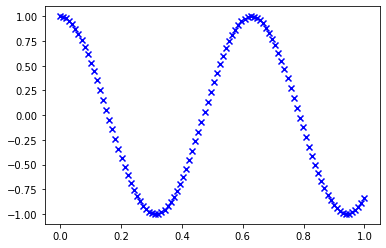

In [72]:
X = np.linspace(0,1,100)
plt.figure(1)
plt.scatter(X,np.cos(X*10),c ='blue',marker='x')

In [64]:
pi

3.141592653589793